# Import Library

In [14]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Loading

In [2]:
data = pd.read_csv('pemilu.csv')
data

,No,Header,Timestamp,URL,Body_Berita,Web Berita
0,1,Waketum PAN Rayu Gerindra-PKB Gabung KIB: Janu...,24/01/2023 16:39,https://news.detik.com/pemilu/d-6531887/waketu...,Wakil Ketua Umum PAN Yandri Susanto merespons ...,Detik
1,2,"Gugat ke MK, PKN Harap Parpol Non-Senayan Bisa...",24/01/2023 16:32,https://news.detik.com/pemilu/d-6531864/gugat-...,Partai Kebangkitan Nusantara (PKN) menggugat U...,Detik
2,3,"PDIP Ajak Kaesang Jadi Kader, Berjenjang Ikut ...",24/01/2023 16:20,https://news.detik.com/pemilu/d-6531832/pdip-a...,Wali Kota Solo Gibran Rakabuming Raka mengungk...,Detik
3,4,"129 Anggota PPS Dilantik, KPU Denpasar Ungkap ...",24/01/2023 16:15,https://www.detik.com/bali/berita/d-6531778/12...,Komisi Pemilihan Umum (KPU) telah melantik 129...,Detik
4,5,PAN Rayu Kaesang Jadi Kader: Agar Jangan 'Satu...,24/01/2023 15:33,https://news.detik.com/pemilu/d-6531715/pan-ra...,Wakil Ketua Umum Partai Amanat Nasional (PAN) ...,Detik
...,...,...,...,...,...,...
1201,1202,"Jelang Pemilu 2024, PKS Targetkan Menang di Ka...",31/01/2023 15:19,https://wartakota.tribunnews.com/2023/01/31/je...,Partai Keadilan Sejahtera (PKS) menargetkan k...,Tribun
1202,1203,Demokrat Soal Koalisi Perubahan: Walau Cuma Be...,31/01/2023 19:18,https://www.tribunnews.com/nasional/2023/01/31...,"Laporan wartawan Tribunnews.com, Danang Triatm...",Tribun
1203,1204,Komisi Aparatur Negara: ASN yang Tidak Netral ...,31/01/2023 20:22,https://tangerang.tribunnews.com/2023/01/31/ko...,Komisi Aparatur Negara (KASN) mengingatkan sel...,Tribun
1204,1205,"Tahu Gak Sih Apa Itu Pantarlih dalam Pemilu, B...",01/02/2023 15:17,https://jateng.tribunnews.com/2023/02/01/tahu-...,Dalam Pemilu banyak petugas yang dilibatkan. S...,Tribun


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           1206 non-null   int64 
 1   Header       1206 non-null   object
 2   Timestamp    1206 non-null   object
 3   URL          1206 non-null   object
 4   Body_Berita  1206 non-null   object
 5   Web Berita   1206 non-null   object
dtypes: int64(1), object(5)
memory usage: 56.7+ KB


In [4]:
data.Timestamp=pd.to_datetime(data.Timestamp)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           1206 non-null   int64         
 1   Header       1206 non-null   object        
 2   Timestamp    1206 non-null   datetime64[ns]
 3   URL          1206 non-null   object        
 4   Body_Berita  1206 non-null   object        
 5   Web Berita   1206 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 56.7+ KB


In [6]:
data['Body_Berita'] = data['Body_Berita'].str.lower()

print('Case Folding Result : \n')
print(data['Body_Berita'].head(5))

Case Folding Result : 

0    wakil ketua umum pan yandri susanto merespons ...
1    partai kebangkitan nusantara (pkn) menggugat u...
2    wali kota solo gibran rakabuming raka mengungk...
3    komisi pemilihan umum (kpu) telah melantik 129...
4    wakil ketua umum partai amanat nasional (pan) ...
Name: Body_Berita, dtype: object


# Tokenizing

In [7]:
# ------ Tokenizing ---------

nltk.download('punkt')

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['Body_Berita'] = data['Body_Berita'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data['Body_Berita'] = data['Body_Berita'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Body_Berita'] = data['Body_Berita'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['Body_Berita'] = data['Body_Berita'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data['Body_Berita'] = data['Body_Berita'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['Body_Berita'] = data['Body_Berita'].apply(remove_singl_char)

# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Body_Berita_tokens'] = data['Body_Berita'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(data['Body_Berita_tokens'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenizing Result : 

0    [wakil, ketua, umum, pan, yandri, susanto, mer...
1    [partai, kebangkitan, nusantara, pkn, mengguga...
2    [wali, kota, solo, gibran, rakabuming, raka, m...
3    [komisi, pemilihan, umum, kpu, telah, melantik...
4    [wakil, ketua, umum, partai, amanat, nasional,...
Name: Body_Berita_tokens, dtype: object


In [8]:
from wordcloud import WordCloud

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

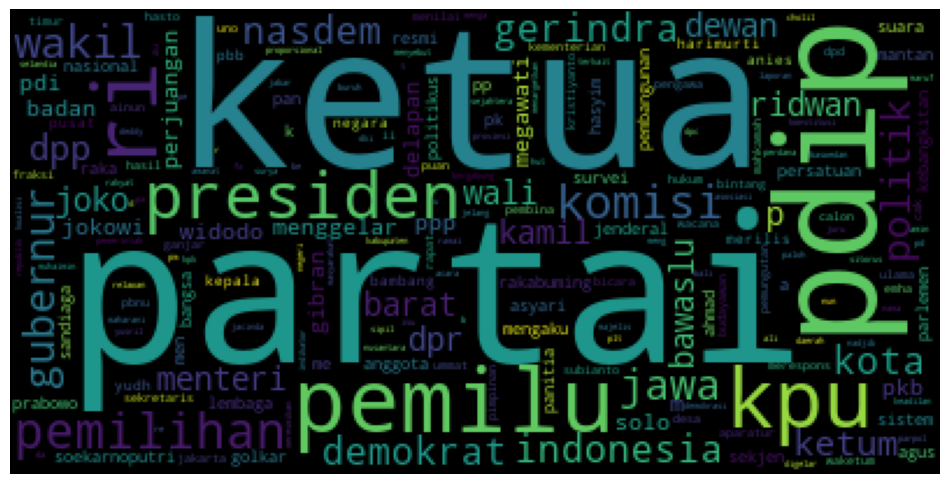

In [15]:
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\b\W*@\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
data['clean_body'] = data['Body_Berita'].apply(clean_text)

text = data['clean_body'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('indonesian'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

data['Body_Berita_tokens_fdist'] = data['Body_Berita_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(data['Body_Berita_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(partai, 14), (kita, 14), (yang, 11), (sekber...
1    [(yang, 19), (pemilu, 15), (mk, 10), (pkn, 9),...
2    [(kaesang, 21), (politik, 16), (di, 13), (yang...
3    [(kpu, 7), (denpasar, 7), (proses, 6), (arsa, ...
4    [(kaesang, 15), (yang, 9), (dan, 9), (politik,...
Name: Body_Berita_tokens_fdist, dtype: object


# Stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "baca", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'bisnis', 'pandemi', 'indonesia','kompas', 'tribun', 'tempo', 'detik'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['Body_Berita_tokens_WSW'] = data['Body_Berita_tokens'].apply(stopwords_removal) 

print(data['Body_Berita_tokens_WSW'].head())

0    [wakil, ketua, pan, yandri, susanto, merespons...
1    [partai, kebangkitan, nusantara, pkn, mengguga...
2    [wali, kota, solo, gibran, rakabuming, raka, a...
3    [komisi, pemilihan, kpu, melantik, anggota, pa...
4    [wakil, ketua, partai, amanat, nasional, pan, ...
Name: Body_Berita_tokens_WSW, dtype: object


# Normalisasi

In [21]:
data['Body_Berita']

0       wakil ketua umum pan yandri susanto merespons ...
1       partai kebangkitan nusantara pkn menggugat uu ...
2       wali kota solo gibran rakabuming raka mengungk...
3       komisi pemilihan umum kpu telah melantik anggo...
4       wakil ketua umum partai amanat nasional pan vi...
                              ...                        
1201    partai keadilan sejahtera pks menargetkan keme...
1202    laporan wartawan tribunnewscom danang triatmoj...
1203    komisi aparatur negara kasn mengingatkan selur...
1204    dalam pemilu banyak petugas yang dilibatkan sa...
1205    laporan wartawan tribunjakartacom wahyu septia...
Name: Body_Berita, Length: 1206, dtype: object

In [22]:
normalizad_word = pd.read_excel('normalisasi.xlsx') 

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Body_Berita_normalized'] = data['Body_Berita_tokens_WSW'].apply(normalized_term)

data['Body_Berita_normalized'].head(10)

0    [wakil, ketua, pan, yandri, susanto, merespons...
1    [partai, kebangkitan, nusantara, pkn, mengguga...
2    [wali, kota, solo, gibran, rakabuming, raka, a...
3    [komisi, pemilihan, kpu, melantik, anggota, pa...
4    [wakil, ketua, partai, amanat, nasional, pan, ...
5    [pusat, pelaporan, analisis, transaksi, keuang...
6    [kali, menviralkan, latolato, tibatiba, demam,...
7    [putra, bungsu, presiden, joko, widodo, jokowi...
8    [partai, nasional, demokrat, nasdem, menargetk...
9    [seribu, panitia, pemungutan, suara, pps, Pemi...
Name: Body_Berita_normalized, dtype: object

In [23]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['Body_Berita_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))


21946


In [24]:
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    
    
    print(term,":" ,term_dict[term])

wakil : wakil
ketua : ketua
pan : pan
yandri : yandri
susanto : susanto
merespons : respons
pernyataan : nyata
ketum : tum
gerindra : gerindra
prabowo : prabowo
subianto : subianto
terbuka : buka
partai : partai
bergabung : gabung
koalisinya : koalisi
berbalik : balik
mengajak : ajak
pkb : pkb
koalisi : koalisi
bersatu : satu
kibya : kibya
gabung : gabung
kib : kib
welcome : welcome
banget : banget
gedung : gedung
mpr : mpr
Republik Indonesia : republik indonesia
senayan : senayan
jakarta : jakarta
selasa : selasa
menyebut : sebut
golkar : golkar
ppp : ppp
parlemen : parlemen
nonparlemen : nonparlemen
menurutnya : turut
komunikasi : komunikasi
non : non
buka : buka
lakukan : laku
diayandri : diayandri
kesepakatan : sepakat
sah : sah
terkait : kait
terwujud : wujud
terjalin : jalin
solidmenurut : solidmenurut
janur : janur
kuning : kuning
melengkung : lengkung
istilahnya : istilah
orang : orang
menikah : meni
ijab : ijab
kabul : kabul
pastikan : pasti
insyaallah : insyaallah
solid : sol

In [25]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Body_Berita_tokens_stemmed'] = data['Body_Berita_normalized'].swifter.apply(get_stemmed_term)

print(data['Body_Berita_tokens_stemmed'])

Pandas Apply:   0%|          | 0/1206 [00:00<?, ?it/s]

0       [wakil, ketua, pan, yandri, susanto, respons, ...
1       [partai, bangkit, nusantara, pkn, gugat, uu, p...
2       [wali, kota, solo, gibran, rakabuming, raka, a...
3       [komisi, pilih, kpu, lantik, anggota, panitia,...
4       [wakil, ketua, partai, amanat, nasional, pan, ...
                              ...                        
1201    [partai, adil, sejahtera, pks, target, menang,...
1202    [lapor, wartawan, tribunnewscom, danang, triat...
1203    [komisi, aparatur, negara, kasn, aparatur, sip...
1204    [pemilihanumum, tugas, libat, pantarlih, panta...
1205    [lapor, wartawan, tribunjakartacom, wahyu, sep...
Name: Body_Berita_tokens_stemmed, Length: 1206, dtype: object


In [26]:
#stopwords #2

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["ada", "tan", "ton", "pt", "komentar", "juta", "unit", "menang", "artikel", 
                       "smartphone", "tagar", "sedia", "kaskus", "seksi"])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['Body_Berita_tokens_stemmed2'] = data['Body_Berita_tokens_stemmed'].apply(stopwords_removal) 

print(data['Body_Berita_tokens_stemmed2'].head())

0    [wakil, ketua, pan, yandri, susanto, respons, ...
1    [partai, bangkit, nusantara, pkn, gugat, uu, p...
2    [wali, kota, solo, gibran, rakabuming, raka, a...
3    [komisi, pilih, kpu, lantik, anggota, panitia,...
4    [wakil, ketua, partai, amanat, nasional, pan, ...
Name: Body_Berita_tokens_stemmed2, dtype: object


In [27]:
doc_clean = data['Body_Berita_tokens_stemmed2']
doc_clean

0       [wakil, ketua, pan, yandri, susanto, respons, ...
1       [partai, bangkit, nusantara, pkn, gugat, uu, p...
2       [wali, kota, solo, gibran, rakabuming, raka, a...
3       [komisi, pilih, kpu, lantik, anggota, panitia,...
4       [wakil, ketua, partai, amanat, nasional, pan, ...
                              ...                        
1201    [partai, adil, sejahtera, pks, target, kabupat...
1202    [lapor, wartawan, tribunnewscom, danang, triat...
1203    [komisi, aparatur, negara, kasn, aparatur, sip...
1204    [pemilihanumum, tugas, libat, pantarlih, panta...
1205    [lapor, wartawan, tribunjakartacom, wahyu, sep...
Name: Body_Berita_tokens_stemmed2, Length: 1206, dtype: object

# LDA Model Using Gensim

In [28]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary(16999 unique tokens: ['agam', 'agustus', 'ajak', 'banget', 'bangsa']...)


In [49]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 5 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

In [50]:
# Running and Trainign LDA model on the document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.032*"sistem" + 0.031*"pemilihanumum" + 0.031*"partai" + 0.025*"proporsional" + 0.017*"tutup" + 0.014*"buka" + 0.012*"pilih" + 0.012*"politik" + 0.010*"mk" + 0.010*"nasdem"'),
 (1,
  '0.020*"politik" + 0.018*"pemilihanumum" + 0.013*"pilih" + 0.012*"presiden" + 0.011*"partai" + 0.010*"jokowi" + 0.008*"survei" + 0.007*"persen" + 0.006*"anies" + 0.006*"kompascom"'),
 (2,
  '0.036*"partai" + 0.014*"ketua" + 0.012*"pdip" + 0.011*"golkar" + 0.009*"ppp" + 0.009*"pkb" + 0.009*"kader" + 0.009*"gerindra" + 0.008*"capres" + 0.007*"megawati"'),
 (3,
  '0.030*"pemilihanumum" + 0.021*"kpu" + 0.015*"pilih" + 0.010*"anggota" + 0.009*"republik indonesia" + 0.007*"bawaslu" + 0.007*"daftar" + 0.007*"selenggara" + 0.006*"pps" + 0.006*"tugas"'),
 (4,
  '0.013*"desa" + 0.011*"politik" + 0.010*"gibran" + 0.010*"jabat" + 0.008*"kepala" + 0.008*"anies" + 0.007*"jokowi" + 0.006*"hasnaeni" + 0.005*"ketua" + 0.005*"presiden"')]

In [51]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
print(df_imp_wcount)

                  word  topic_id  importance  word_count
0               sistem         0    0.031741        1623
1        pemilihanumum         0    0.031122        4390
2               partai         0    0.030847        4433
3         proporsional         0    0.024765        1232
4                tutup         0    0.016817         906
5                 buka         0    0.013589         939
6                pilih         0    0.012173        2317
7              politik         0    0.012058        2284
8                   mk         0    0.010043         525
9               nasdem         0    0.009991         820
10             politik         1    0.019982        2284
11       pemilihanumum         1    0.017975        4390
12               pilih         1    0.013314        2317
13            presiden         1    0.011582        1384
14              partai         1    0.010647        4433
15              jokowi         1    0.010443        1043
16              survei         

In [52]:
df_imp_wcount.to_csv('topik_modeling_pemilu1.csv')

In [34]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [35]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.9960   
1            1               1              0.8422   
2            2               1              0.9971   
3            3               2              0.9944   
4            4               1              0.9960   
5            5               2              0.9965   
6            6               0              0.7823   
7            7               1              0.9960   
8            8               0              0.9902   
9            9               2              0.8852   

                                            Keywords  \
0  partai, pemilihanumum, sistem, proporsional, p...   
1  partai, pemilihanumum, sistem, proporsional, p...   
2  partai, pemilihanumum, sistem, proporsional, p...   
3  pemilihanumum, kpu, pilih, anggota, republik i...   
4  partai, pemilihanumum, sistem, proporsional, p...   
5  pemilihanumum, kpu, pilih, anggota, republik i...   
6  partai, an

In [40]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [41]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

In [43]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]

In [44]:
# proses ini mungkin agak lama
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [45]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [48]:
pyLDAvis.save_html(LDAvis_prepared, 'D:\Perindo\Web Scrapping\Data\Website_Berita\ldavis_prepared_3'+ str(total_topics) +'.html')

<>:1: DeprecationWarning: invalid escape sequence \P
<>:1: DeprecationWarning: invalid escape sequence \P
C:\Users\Admin\AppData\Local\Temp\ipykernel_15172\3540675582.py:1: DeprecationWarning: invalid escape sequence \P
  pyLDAvis.save_html(LDAvis_prepared, 'D:\Perindo\Web Scrapping\Data\Website_Berita\ldavis_prepared_3'+ str(total_topics) +'.html')


In [47]:
# proses ini mungkin agak lama
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.100359  0.086192       1        1  39.602010
2     -0.153211  0.019872       2        1  34.903231
0      0.052852 -0.106064       3        1  25.494759, topic_info=               Term         Freq        Total Category  logprob  loglift
1101   proporsional  1158.000000  1158.000000  Default  30.0000  30.0000
874          sistem  1524.000000  1524.000000  Default  29.0000  29.0000
296            pdip  1063.000000  1063.000000  Default  28.0000  28.0000
57           partai  4119.000000  4119.000000  Default  27.0000  27.0000
515           anies   704.000000   704.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
60    pemilihanumum   355.897483  4110.641064   Topic3  -5.0682  -1.0800
546          dukung   205.630228   728.204846   Topic3  -5.6168   0.1022
96            wakil   207.432757   830.575219   Topic3  -5.6080  -0.0206
190           pilih   240.117341  2167.907990   Topic3  -5.4617  -0.8337
404           kader   190.656563   621.781565   Topic3  -5.6924   0.1846

[242 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2206      1  0.992462        ace
3635      1  0.167848        ahy
3635      3  0.829916        ahy
2390      3  0.983785      ainun
1989      1  0.996314  airlangga
...     ...       ...        ...
96        2  0.209493      wakil
96        3  0.249225      wakil
4446      2  0.988059     wanita
5470      1  0.995268     yusril
1131      1  0.976205     yuwono

[387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])